# Bienvenue à la session interactive sur l'IRM de diffusion avec ![DIPY](https://dipy.org/dipy/static/images/dipy-logo.png)

<br><br>


Pesez sur la `barre d'espace` pour continuer.

## Voici les commandes essentielles pour naviguer la présentation:

* `barre d'espace` pour passer à la diapositive suivante
* `shift+barre d'espace` pour revenir en arrière
* `shift+enter` pour rouler les cellules de codes

* `alt+r` pour mettre ou enlever le mode présentation afin de tomber en mode jupyte notebook traditionnelle.

![](image16.jpeg)
(c)SCIL

## Petit secret, vous pouvez modifier le contenu des cellules.
 
Vraiment pratique lorsque l'on veut modifier un paramètre sans quitter le mode présentation.

## Bon, débutons.


<br> <br>


Diffusion isotropique |  | Diffusion anisotropique
 -|- - -|-
![Diffusion isotropique](isotropic.gif)| vs | ![Diffusion anisotropique](anisotropic.gif)


# Qu'est-ce que [DIPY](https://dipy.org)?

DIPY est un projet et un logiciel open source et gratuit pour la neuroanatomie computationnelle, se concentrant principalement sur **l'analyse de l'imagerie par résonance magnétique de diffusion** (**IRMd**). Il implémente une large gamme d'algorithmes pour le denoising, le recallage, la reconstruction, le tracking, le clustering, la visualisation et l'analyse statistique des données IRM de diffusion.


# Premiers pas avec DIPY

Em IRM de diffusion (IRMd), nous utilisons généralement trois types de fichiers, un **fichier Nifti avec les données pondérées en diffusion** et **deux fichiers texte** un avec des valeurs *b* (**bval**) et un avec les vecteurs *b* (**bvec**). Éventuellement, nous aurons besoin du fichier **Nifti de la T1 anatomique** pour à des fins de recallage et de segmentation pour bien tracer les faisceaux de matières blanches. 

Heureusement, DIPY fournit des outils pour charger et traiter ces fichiers en plus de nous donner accès à des ensembles de données disponibles à ceux qui n'ont pas leurs propres jeux de données d'IRMd.

# Importation des packages

Avant de commencer, il faut toujours importer les packages que nous aurons de besoin dans l'environnement.
Autrement, Python ne reconnaitra pas les commandes que nous lui demanderons d'exécuter.

In [3]:
# Import necessary modules
import numpy as np # contient fonctions pour calculs numériques
import matplotlib.pyplot as plt # Data viz
from dipy.data import fetch_sherbrooke_3shell # 1er jeu de données
from dipy.data import get_fnames # 2e jeu de données
# Les autres packages seront chargés au moment venu.


Une fois les packages importés, la première étape est de télécharger des images pour pouvoir les explorer par la suite.

*(NB: Les images peuvent prendre plusieurs minutes à télécharger)*

Avec les commandes suivantes, nous pouvons télécharger deux jeux de données dMRI

In [4]:
fetch_sherbrooke_3shell()
hardi_fname, hardi_bval_fname, hardi_bvec_fname = get_fnames('stanford_hardi')

## Mais, où sont les données?

Par défaut, les données sont téléchargées dans le dossier `.dipy` dans le répertoire "*home*" ou `~/`. 

Pour y avoir accès, nous devons trouver un moyen de communiquer à DIPY où se trouvent nos données. Pour ce faire, nous créeons des objets contenant le chemin vers les données respectives.

Nous pourrions entrer directement (*hard code*) le chemin dans les formules, par exemple: `~/.dipy/sherbrooke_3shell/`, mais ce ne serait pas pratique à long terme. En effet, si jamais nous décidions de changer le jeux de données, il faudrait chercher **tous** les chemins et les changer manuellement.

Ainsi, la cellule ci-bas va importer deux fonctions de `os.path` afin de créer différents objets en lien avec les chemins:
* `home` = répertoire *home* de la personne. Vous remarquerez que le symbole `~` est équivalent à `/home/username/`, dans mon cas `/home/sam/`
* `dname` = le nom du répertoire qui contient les 3 fichiers de données.
* `fdwi` = le fichier avec les données d'IRM de diffusion.
* `fbval` = le fichier contenant les valeurs *b*.
* `fbvec` = le fichier contenant les vecteurs *b*. 

In [5]:
from os.path import expanduser, join

home = expanduser('~')
print("Chemin vers home =", home)

dname = join(home, '.dipy', 'sherbrooke_3shell')
print("Chemin pour dname =", dname)

fdwi = join(dname, 'HARDI193.nii.gz')
print("Chemin vers fdwi =", fdwi)

fbval = join(dname, 'HARDI193.bval')
print("Chemin vers fbval =", fbval)

fbvec = join(dname, 'HARDI193.bvec')
print("Chemin vers fbvec =", fbvec)

Chemin vers home = /home/sam
Chemin pour dname = /home/sam/.dipy/sherbrooke_3shell
Chemin vers fdwi = /home/sam/.dipy/sherbrooke_3shell/HARDI193.nii.gz
Chemin vers fbval = /home/sam/.dipy/sherbrooke_3shell/HARDI193.bval
Chemin vers fbvec = /home/sam/.dipy/sherbrooke_3shell/HARDI193.bvec


## Enfin, nous avons accès aux données!

Par contre, ce n'est pas aussi simple, car avoir accès aux données diffère d'avoir les données importées dans le notebook!

Il faut donc débuter par charger les données d'IRM. Pour cela, nous utilisons un autre package appelée [**nibabel**](http://nipy.org/nibabel) qui nous permet de lire et d'écrire des formats de fichiers spécifiques à la neuroimagerie.

[nibabel](http://nipy.org/nibabel) est appelé par le biais de l'importation du module `dipy.io.image`, qui permet est de charger et d'enregistrer des ensembles de données d'imagerie.

In [6]:
from dipy.io.image import load_nifti
data, affine, img = load_nifti(fdwi, return_img=True)

Nous pouvons visualiser rapidement les résultats en utilisant [matplotlib](http://matplotlib.sourceforge.net/). Par exemple, nous pouvons visualiser les tranches axiales médianes du volume 0 sans pondération (gauche) et du volume 10 avec pondération (droite) de diffusion.

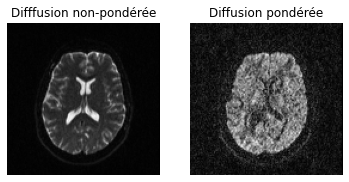

In [7]:
%matplotlib inline
axial_middle = data.shape[2] // 2
plt.figure('Showing the datasets')
plt.subplot(1, 2, 1).set_axis_off()
plt.imshow(data[:, :, axial_middle, 0].T, cmap='gray', origin='lower')
plt.title("Difffusion non-pondérée")
plt.subplot(1, 2, 2).set_axis_off()
plt.imshow(data[:, :, axial_middle, 10].T, cmap='gray', origin='lower')
plt.title("Diffusion pondérée")
plt.show()
# plt.savefig('data.png', bbox_inches='tight')

Il est également possible de trouver la dimension (en mm) des voxels en fouillant dans l'en-tête (*header*) des images.

In [8]:
print(img.header.get_zooms()[:3])

(2.0, 2.0, 2.0)


# Fichier bvec, fichier bval !?

Ces deux fichier sont essentiels pour la reconstruction des images de diffusion, car ils continnent des informations clés de la séquence IRM.

L'étape suivante consiste à vérifier les valeurs *b* (bval) et les vecteurs *b* (bvec) à l'aide de la fonction `read_bvals_bvecs` à partir des objets `fbval` et `fbvec`, contenant les deux chemins menant à leur fichier respectif.

In [9]:
from dipy.io import read_bvals_bvecs
bvals, bvecs = read_bvals_bvecs(fbval, fbvec)

Dans DIPY, l'objet appelé `GradientTable` est vraiment utile, car il contient tous les paramètres spécifiques à l'acquisition, par ex. valeurs b, vecteurs b, timings et autres. Pour créer cet objet, nous pouvons utiliser la fonction `gradient_table`.

On peut imprimer les valeurs *b* pour voir les différentes *shells*.

In [10]:
from dipy.core.gradients import gradient_table
gtab = gradient_table(bvals, bvecs)
print(gtab.bvals)

[   0. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 2000. 2000. 2000. 2000. 2000. 2000. 2000.
 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000.
 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000.
 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000.
 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000.
 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 3500. 3500. 3500.
 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500.
 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500.
 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 35

Ici, on constate qu'il y a 3 shells, soit 1000, 2000 et 3500. Le 0 équivant la diffusion sans pondération. Ça ne vous dit probablement pas grand chose pour le moment et c'est normal.

Pour  confirmer qu'il y a bien qu'une seul image avec un valeur *b* de 0, on peut regarder les dimensions des S0, soit sans pondération.

In [11]:
S0s = data[:, :, :, gtab.b0s_mask]
print(S0s.shape)

(128, 128, 60, 1)


Nous pouvons également imagés les orientations / vecteurs. Ma version de python brise une des fonctions, donc voici une vidéo à la place. 

# Acquisition

In [12]:
%%HTML
<video width=1000" height="1000" controls>
  <source src="https://github.com/arokem/2015-11-16-viscog/blob/gh-pages/images/dMRI-signal-movie.mp4?raw=true" type="video/mp4">
</video>

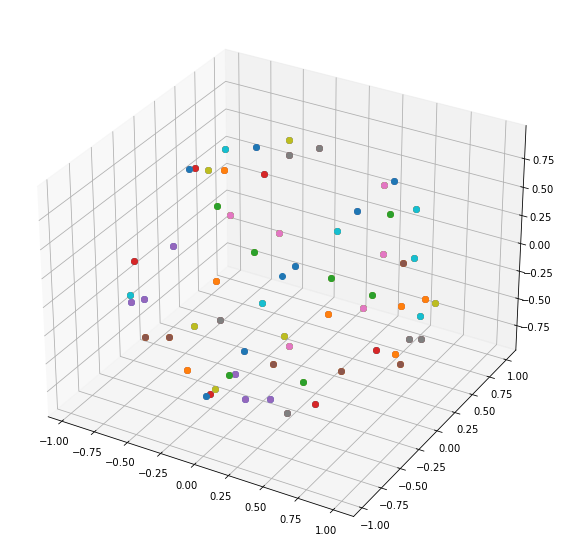

In [13]:


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
# plot3D expects something with length, so we convert into 1-item arrays:
for x,y,z in gtab.bvecs:
    ax.plot3D(np.ones(1) * x, np.ones(1) * y, np.ones(1) * z, 'o')o



# TODO: Imager gradients et shells

`dipy.io.gradients` est pour charger / enregistrer nos bvals et bvecs

`dipy.reconst` est pour les algorithmes de reconstruction que nous utilisons pour créer des modèles de voxel à partir des données brutes.

# DTI

Même si la plupart des modules sont déjà chargés, nous ne prenons pas de chance, nous chargeons tous les modules requis à nouveau par souci de simplicité. Le plus important d'entre eux étant `dipy.reconst.dti` puisqu'il permettra de modéliser les tenseurs de diffusion.

In [14]:
import numpy as np
from dipy.io.image import load_nifti, save_nifti
from dipy.io.gradients import read_bvals_bvecs
from dipy.core.gradients import gradient_table
import dipy.reconst.dti as dti
from dipy.segment.mask import median_otsu


# Charger les données

Une fois chargées, nous pouvons regarder la forme des données.

In [17]:
data, affine = load_nifti(hardi_fname)

bvals, bvecs = read_bvals_bvecs(hardi_bval_fname, hardi_bvec_fname)
gtab = gradient_table(bvals, bvecs)

print('data.shape (%d, %d, %d, %d)' % data.shape)




data.shape (81, 106, 76, 160)


Tout d'abord, nous masquons et recadrons les données. C'est un moyen rapide d'éviter de calculer des tenseurs ailleurs que dans le cerveau. Cela se fait à l’aide du module `mask` de DIPY.

In [18]:
maskdata, mask = median_otsu(data, vol_idx=range(10, 50), median_radius=3,
                             numpass=1, autocrop=True, dilate=2)
print('maskdata.shape (%d, %d, %d, %d)' % maskdata.shape)

maskdata.shape (71, 88, 62, 160)


# Modélisation des tenseurs

Maintenant que nous avons préparé les données, nous pouvons aller de l'avant avec la reconstruction du voxel. Tout d'abord, nous appelons le TensorModel de la manière suivante.


In [19]:
tenmodel = dti.TensorModel(gtab)

L'ajustement des données est très simple. Cependant, c'est l'étape la plus demande en puissance, donc profitez-en pour boire une gorgée. Il suffit d'appeler la méthode `fit` du `TensorModel` de la manière suivante:

In [20]:
tenfit = tenmodel.fit(maskdata)


La méthode `fit` crée un objet `TensorFit` qui contient les paramètres d'ajustement et d'autres attributs du modèle. Par exemple, nous pouvons générer une anisotropie fractionnelle (FA) à partir des valeurs propres du tenseur. FA est utilisée pour caractériser le degré auquel la distribution de diffusion dans un voxel est directionnelle. Autrement dit, s'il existe une diffusion relativement illimitée dans une direction particulière.

Notez que FA doit être interprété avec prudence. Cela peut être une indication de la densité de tassement des fibres dans un voxel et de la quantité de myéline enveloppant ces axones, mais ce n'est pas toujours une mesure de «l'intégrité neuronales ou des tissus». Par exemple, la FA peut diminuer aux endroits où il y a un évent de fibres de substance blanche, ou là où plus d'une population de fibres de substance blanche se croise.

In [69]:
print('Computing anisotropy measures (FA, MD, RGB)')
from dipy.reconst.dti import fractional_anisotropy, color_fa

FA = fractional_anisotropy(tenfit.evals)
FA[np.isnan(FA)] = 0
save_nifti('tensor_fa.nii.gz', FA.astype(np.float32), affine)
save_nifti('tensor_evecs.nii.gz', tenfit.evecs.astype(np.float32), affine)
MD1 = dti.mean_diffusivity(tenfit.evals)
save_nifti('tensors_md.nii.gz', MD1.astype(np.float32), affine)
MD2 = tenfit.md

Computing anisotropy measures (FA, MD, RGB)


Computing tensor ellipsoids in a part of the splenium of the CC


In [70]:
FA = np.clip(FA, 0, 1)
RGB = color_fa(FA, tenfit.evecs)
save_nifti('tensor_rgb.nii.gz', np.array(255 * RGB, 'uint8'), affine)

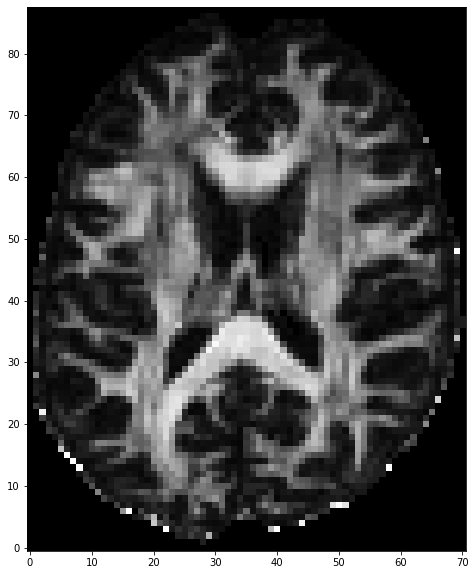

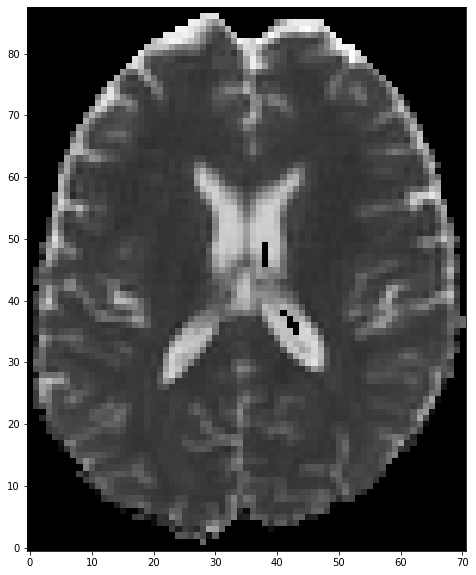

In [66]:
plt.figure(figsize = (10,10))
plt.imshow(FA[:, :, 31].T, cmap='gray', origin='lower')
plt.figure(figsize = (10,10))
plt.imshow(MD1[:, :, 31].T, cmap='gray', origin='lower')

In [76]:
cfa = RGB[13:43, 44:74, 28:29]
cfa /= cfa.max()

scene.add(actor.tensor_slicer(evals, evecs, scalar_colors=cfa, sphere=sphere,
                              scale=0.3))

print('Saving illustration as tensor_ellipsoids.png')
window.record(scene, n_frames=1, out_path='tensor_ellipsoids.png',
              size=(600, 600))
if interactive:
    window.show(scene)


Saving illustration as tensor_ellipsoids.png


In [72]:
print('Computing tensor ellipsoids in a part of the splenium of the CC')

from dipy.data import get_sphere
sphere = get_sphere('repulsion724')

from dipy.viz import window, actor

# Enables/disables interactive visualization
interactive = False

scene = window.Scene()

evals = tenfit.evals[13:43, 44:74, 28:29]
evecs = tenfit.evecs[13:43, 44:74, 28:29]

Computing tensor ellipsoids in a part of the splenium of the CC


In [77]:
scene.clear()

In [74]:
tensor_odfs = tenmodel.fit(data[20:50, 55:85, 38:39]).odf(sphere)

odf_actor = actor.odf_slicer(tensor_odfs, sphere=sphere, scale=0.5,
                             colormap=None)
scene.add(odf_actor)
print('Saving illustration as tensor_odfs.png')
window.record(scene, n_frames=1, out_path='tensor_odfs.png', size=(600, 600))
if interactive:
    window.show(scene)

Saving illustration as tensor_odfs.png
